### [2025.4.13] Simulation of speckle interferometry


1. A rough taget at distance $z$ is illuminated with $M = N\times N$ beams

2. Assume the wavefront of all $M = N\times N$ tilted beams to be flat (plane wave)

3. Tilted beams have Gaussain beam profile with the tilted angle $\phi^{x}_{m}$ in $\hat{x}$ and $\phi^{y}_{n}$ in $\hat{y}$

4. Amplitude reflectivity $\tilde{R}(x,y)$ and randomized phasor $\Gamma$ to simulate $1^{st}$-order speckle patterns

5. Fourier transform the backscattered echos to the receiver pupil plane for $M = N\times N$ beams

6. Calculate the amplitude and phase from the spatial interferometry of $M(M-1)/2$ beams for a given fronzen time

7. Run time evolution

Note:
1. ``k_mag'' is the magnitude of the Kg (object). The magnitude of 0.602 set in the simulation is to match the k-vector of the non-redundant beam array. 
If Kg is parallel to x-direction, the beam pair that resonates with Kg will produce a good mesurment for the speckle interferometry of that RF frequency tone.

#### Object: A few (spatial) frequency grating

In [ ]:
from matplotlib import pyplot as plt
import matplotlib as mpl
# matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import math
import sys
import time
import os
import h5py
import sympy
import pandas as pd
from datetime import date
from tqdm import tqdm

In [2]:
## the defalt path is ".../code". Need to go to upper directory for parent_dir
os.path.abspath('')
code_dir = "%s/"%os.getcwd()
parent_dir = code_dir.replace('code/','')
function_dir = parent_dir + 'functions/'
data_dir = parent_dir + 'data/'
fig_dir = parent_dir + 'figures/'
sys.path.insert(0,parent_dir)

In [3]:
## import coustom functions
import functions.f_complex_phasor_hsl_v1 as chsl
import functions.fbasis_functions_all_v4 as funs_v4
import functions.fbasis_functions_simulation_only_v1 as funs_sim

In [203]:
## functions
def imag_linear2log_v1(c1,c2,input):
    Ny,Nx = np.shape(input)
    input_mag = np.abs(input)
    in_max = np.max(input_mag)
    out_log = c1*np.log(1+c2*input)/np.log(1+c2*in_max)
    out_log_imag = np.zeros([Ny,Nx])
    out_log_imag[:,:] =out_log
    return out_log_imag 

def showfig_recon_image_spkl_v1(shouldsave,mgx,mgy,D_cir,dimension,irun,Ica,Ics,Icsa):

    fig,ax = plt.subplots(1,3,figsize=(12,4))
    fig.suptitle(f"Receiver aperture Size = {np.round(D_cir/mgx).astype('int')}x{np.round(D_cir/mgy).astype('int')} specklons")
    ax[0].imshow(Ica,cmap='gray')
    ax[0].set_title("Specular Surface")
    ax[0].axis('off')
    ax[1].imshow(Ics,cmap='gray')
    ax[1].set_title("Rough Surface")
    ax[1].axis('off')
    ax[2].imshow(Icsa,cmap='bwr')
    ax[2].axis('off')
    ax[2].set_title("Difference")

    if shouldsave:
        save_dir = parent_dir + f"figures/Recon_image/{dimension}x{dimension}/D_cir{D_cir}pixels/"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(save_dir + f"Recon_image_{dimension}x{dimension}_D_cir{D_cir}pixels_run{irun}.pdf", dpi=1000, bbox_inches='tight',transparent=True)


def showfig_recon_image_spkl_v2(shouldsave,mgx,mgy,D_cir,dimension,irun,Ica,Ics,I_complex_ag_hsl,I_complex_hsl):


    fig,ax = plt.subplots(1,4,figsize=(12,3))
    fig.suptitle(f"Receiver aperture Size = {np.round(D_cir/mgx).astype('int')}x{np.round(D_cir/mgy).astype('int')} specklons")
    ax[0].imshow(Ica,cmap='gray')
    ax[0].set_title("Object (Specular)")
    ax[0].axis('off')
    ax[1].imshow(I_complex_ag_hsl)
    ax[1].set_title("uv-Plane (Specular)")
    ax[1].axis('off')
    ax[2].imshow(Ics,cmap='gray')
    ax[2].set_title("Object (Rough)")
    ax[2].axis('off')
    ax[3].imshow(I_complex_hsl)
    ax[3].set_title("uv-Plane (Specular)")
    ax[3].axis('off')

    if shouldsave:
        save_dir = parent_dir + f"figures/Imag_uv/{dimension}x{dimension}/D_cir{D_cir}pixels/"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(save_dir + f"Imag_uv_{dimension}x{dimension}_D_cir{D_cir}pixels_run{irun}.pdf", dpi=1000, bbox_inches='tight',transparent=True)
        plt.close()


def showfig_recon_image_spkl_v3(shouldsave,mgx,mgy,D_cir,dimension,irun,Ica,Ics,I_complex_ag_hsl,I_complex_hsl):


    fig,ax = plt.subplots(1,4,figsize=(12,3))
    fig.suptitle(f"Receiver aperture Size = {np.round(D_cir/mgx).astype('int')}x{np.round(D_cir/mgy).astype('int')} specklons")
    ax[0].imshow(Ica,cmap='binary',origin='lower')
    ax[0].set_title("Object (Specular)")
    ax[0].axis('off')
    ax[1].imshow(I_complex_ag_hsl,origin='lower')
    ax[1].set_title("uv-Plane (Specular)")
    ax[1].axis('off')
    ax[2].imshow(Ics,cmap='binary',origin='lower')
    ax[2].set_title("Object (Rough)")
    ax[2].axis('off')
    ax[3].imshow(I_complex_hsl,origin='lower')
    ax[3].set_title("uv-Plane (Specular)")
    ax[3].axis('off')

    if shouldsave:
        save_dir = parent_dir + f"figures/grat_imag_uv_v3/{dimension}x{dimension}/D_cir{D_cir}pixels/"
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        plt.savefig(save_dir + f"Grat_imag_uv_{dimension}x{dimension}_D_cir{D_cir}pixels_run{irun}.pdf", dpi=1000, bbox_inches='tight',transparent=True)
        plt.close()
    else:
        plt.show()

In [5]:
## Load objects
saveobj = True
Nx = 512
Ny = 512
Nrx = int(2**10)
Nry = int(2**10)
Npadx = int((Nrx-Nx)/2)
Npady = int((Nry-Ny)/2)

# m_k = 0.1     ## scaled factor of the angle/k-vector
m_k = 0.1     ## scaled factor of the angle/k-vector

## object with three Kg-vector and visibility
Nobj = 1
phi = np.linspace(0,np.pi,Nobj,endpoint=True)
# k_mag = 0.689
k_mag = 0.689*m_k
kx_au = k_mag*np.cos(phi)
ky_au = k_mag*np.sin(phi)
mv = np.ones(Nobj)  ## mv<=1

# kx_au = (0.6,0.6,0,0.6)
# ky_au = (0,0.6,0.6,-0.6)
# mv = (1,1,1,1)  ## mv<1

## coordinate
x_au = np.arange(-Nx/2,Nx/2)
y_au = np.arange(-Ny/2,Ny/2)
X_au,Y_au = np.meshgrid(x_au,y_au)
x_au_pad = np.arange(-Nrx/2,Nrx/2)
y_au_pad = np.arange(-Nry/2,Nry/2)
X_au_pad,Y_au_pad = np.meshgrid(x_au_pad,y_au_pad)

## Gaussian tapering function
mgx = 1
mgy = 1
wx = mgx*Nx
wy = mgy*Ny
gaus = np.exp(-X_au**2/wx**2 - Y_au**2/wy**2)

## object reflectivity
Robj1 = np.zeros((Ny,Nx))
for isf in range(len(kx_au)):
# for isf in range(1):
    # Robj1_temp = 1 + mv[isf]*np.cos(*np.pi*(kx_au[isf]*X_au+ky_au[isf]*Y_au)+2*np.pi*isf/len(kx_au))
    Robj1_temp = 1 + mv[isf]*np.cos(2*np.pi*(kx_au[isf]*X_au+ky_au[isf]*Y_au)+np.pi/2)*gaus
    Robj1 = Robj1 + Robj1_temp
Robj1 = Robj1/np.mean(Robj1)
Robj1_pad = np.pad(Robj1,(Npadx,Npady))
FT_Robj1 = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(Robj1_pad)))

In [6]:
## complex colormap representation
c1 = 1
c2 = 0.000001
s0 = 1
l0 = 1
FT_Robj1_log = imag_linear2log_v1(c1,c2,np.abs(FT_Robj1))
FT_Robj1_log_hsl = chsl.hsl_complex_v1(s0,l0,FT_Robj1_log*np.exp(1j*np.angle(FT_Robj1)))

In [ ]:
## save randomized phase
savepkl = False
# Nrun = int(2**1)
Nrun = int(2**7)

rand_pkl_dir = data_dir + f"speckle_phase/{Nx}x{Ny}/"
if savepkl:
    if not os.path.exists(rand_pkl_dir):
        os.makedirs(rand_pkl_dir)
    for irun in tqdm(range(Nrun)):
        gamma_r = np.exp(-1j*2*np.pi*np.random.uniform(low=0.0, high=1.0, size=(Ny,Nx)))
        pd.DataFrame(gamma_r).to_pickle(rand_pkl_dir + f"speckle_phase_run{irun}.pickle")

# Nrun = 2
Nrun = 1

  0%|          | 0/128 [00:00<?, ?it/s]

100%|██████████| 128/128 [00:00<00:00, 151.60it/s]


In [8]:
ShortFFT = True
p_seg = 1
Bandwidth = 10e6
StartFreq = 70e6
Min_grid = 1e2

if Bandwidth ==10E6:
    bw_str = "10MHz/"
elif Bandwidth == 20E6:
    bw_str = "20MHz/"
else:
    input("Bandwidth is not set to 10 or 20 MHz")

In [9]:
##Sampling rate for the time stamps
SampleFreq = 100e6

In [10]:
##Spatial dimensions and 2D grid
va = 600
Dfringes = 1/4.5e-3
Mag = Bandwidth/va/Dfringes
Factor_NySampling = 2
lbda = .5e-6
Dist = 1e2
Rx_Diameter = 25e-3

In [11]:
Phase_tone_case = 2

In [12]:
# D_cir_all = 2**np.arange(3,8+1).astype('int')
D_cir_all = 2**np.array([8]).astype('int')

In [13]:
#Dimension setting: dimension choices: 2, 4, 5, 6, 8, 12, 16, 24, 32, 48
dimension_case = 1
if dimension_case == 1:
    dimension_all = np.array([16]).astype('int')
elif dimension_case == 2:
    dimension_all = np.array([24]).astype('int')

In [14]:
for dimension_ind,dimension in enumerate(dimension_all):
    for D_cir_ind in range(len(D_cir_all)):
        D_cir = D_cir_all[D_cir_ind]
        W_cir = np.zeros([Nry,Nrx])
        W_cir[X_au_pad**2+Y_au_pad**2<(D_cir/2)**2] = 1

        angles = np.linspace(0,np.pi*4,400)
        x_rx = np.sin(angles)*D_cir/2+Nx/2
        y_rx = np.cos(angles)*D_cir/2+Ny/2

        if Phase_tone_case ==1:
            ##Case1: Zero phases
            Phase_signal = np.zeros((dimension,1))
            Phase_signal_x = Phase_signal
            Phase_signal_y = Phase_signal
            Phase_name = "ZeroPhases"
        elif Phase_tone_case==2:
            ##Case2: Random phases
            Name_Rx = f"{data_dir+'Phase_offset/'}Rand_phase_x_{dimension:.0f}Signals.mat"
            Name_Rx_hfile = h5py.File(Name_Rx, 'r')
            Phase_signal_x_h5 = Name_Rx_hfile.get("Phase_signal_x")
            Phase_signal_x = np.array(Phase_signal_x_h5)
            Name_Ry = f"{data_dir+'Phase_offset/'}Rand_phase_y_{dimension:.0f}Signals.mat"    
            Name_Ry_hfile = h5py.File(Name_Ry, 'r')
            Phase_signal_y_h5 = Name_Ry_hfile.get("Phase_signal_y")
            Phase_signal_y = np.array(Phase_signal_y_h5)
            Phase_name = "RandomPhases"    
        elif Phase_tone_case==3:    
            ## Case3: Quantized phases over 2*pi [rad]
            Phase_signal = np.linspace(0, 2*math.pi - 2*math.pi/dimension, dimension)
            Phase_signal_x = Phase_signal
            Phase_signal_y = Phase_signal
            Phase_name = "QuantizedPhases"  

        ##Part 1: 1D NRA dataset (dimension 2, 4, 5, 6, 8, 12, 16, 24, 32, 48)
        nra_1d = funs_v4.fbasis_nra_1d_gen_v1(dimension)

        ##Part 2: 2D NRA generator RF beatnotes
        LR1Ds,gridsize, p_list, p_ix, prime_num, prime_denom, yxratio = funs_v4.fbasis_2dNRA_gen_v1(dimension, nra_1d)

        ##Part 3: Set Y/X scale factor to ratio of two primes nearest to twice the RF grid size
        nra_x,nra_y,LR2Ds,LR2Ds_beat,LR2Ds_beat_reshaped,LR2Ds_beat_sorted,Ind_sort = funs_v4.fbasis_2dNRA_LR2Ds_beat_v1(nra_1d,yxratio)

        ##Part 4: 2D frequency array setting
        Factor_mod,SignalFreq_array_x,SignalFreq_array_y,BeatFreq_1d,BeatFreq_array,IA,IC,LR2Ds_beat_1d,LR2Ds_beat_1d_unique = funs_v4.fbasis_2d_beatnote_v1(Bandwidth,StartFreq,nra_x,nra_y,LR2Ds_beat)

        ##Part 5: Offset Phase Array for 2D NRA
        Phase_2Ds,Phase_1Ds_beat,Phase_1Ds_beat_sorted,diff_beat_min,N_period = funs_v4.fbasis_phase_beat_v1(nra_1d,nra_x,nra_y,Phase_signal_x,Phase_signal_y,Ind_sort,IA,SampleFreq,BeatFreq_array)

        ##Part 6: Spatial fringes and 2D grids
        _,_,Ngrid_x,Ngrid_y,delta_x,delta_y,_,_ = funs_v4.fbasis_set2dgrid_dim_v1(BeatFreq_array,SignalFreq_array_x,SignalFreq_array_y,Factor_NySampling,va)

        ##Part 7: Set the 2D spatial grids pass zero x and y, with even number of grids for convenience.
        _,_,_,_,_,_,_,_,_,_,_,_,Nx_AO,Ny_AO = funs_v4.fbasis_2dgrid_gen_v1(Ngrid_x,Ngrid_y,delta_x,delta_y,Mag,lbda,Dist)

        ## 2D plane waves for M = N x N beams
        nra_x_norm = 2*(nra_x - nra_x[-1]/2)/nra_x[-1]
        nra_y_norm = 2*(nra_y - nra_y[-1]/2)/nra_y[-1]*yxratio

        spl_obj_4d = np.zeros((Nry,Nrx,len(nra_y),len(nra_x)),dtype='complex64')
        spl_obj_4d_ag = np.zeros((Nry,Nrx,len(nra_y),len(nra_x)),dtype='complex64')

        for irun in range(Nrun):
            ## load randomized phase
            rand_pkl_dir = data_dir + f"speckle_phase/{Nx}x{Ny}/"
            gamma_r = np.array(pd.read_pickle(rand_pkl_dir+f"speckle_phase_run{irun}.pickle"))

            savepkl = False
            # if savepkl:
            for itonex in tqdm(range(len(nra_x_norm))):
                for itoney in range(len(nra_x_norm)):
                    pw = np.exp(1j*2*np.pi*m_k*(nra_x_norm[itonex]*X_au + nra_y_norm[itoney]*Y_au))
                    ## speckle with object reflectivity
                    spkl_pad = np.pad(gaus*Robj1*pw*gamma_r,(Npadx,Npady))
                    unspkl_pad = np.pad(gaus*Robj1*pw,(Npadx,Npady))
                    spl_obj = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(spkl_pad)))
                    spl_obj_ag = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(unspkl_pad)))
                    spl_obj_4d[:,:,itoney,itonex] = spl_obj
                    spl_obj_4d_ag[:,:,itoney,itonex] = spl_obj_ag

            ## save the 4D speckle object
            speck_pkl_dir = data_dir + f"speckle_4D/{dimension:.0f}x{dimension:.0f}/Beamwidth_{wx:.0f}x{wy:.0f}/"
            if not os.path.exists(speck_pkl_dir):
                os.makedirs(speck_pkl_dir)
            save_name = speck_pkl_dir + f"speckle_4D_run{irun}.pickle"
            if savepkl:
                pd.DataFrame(spl_obj_4d.reshape(-1)).to_pickle(save_name)
            # else:
            #     spl_obj_4d = np.array(pd.read_pickle(save_name)).reshape((Ny,Nx,len(nra_y),len(nra_x)))
            #     # print("No speckle 4D data saved")

            ## Multibeam speckle interferometry
            uv_cover = np.zeros((Ny_AO,Nx_AO))
            I_complex = np.zeros((Ny_AO,Nx_AO),dtype='complex64')
            I_complex_ag = np.zeros((Ny_AO,Nx_AO),dtype='complex64')

            for itonex1 in tqdm(range(len(nra_x_norm))):
                for itonex2 in range(len(nra_x_norm)):
                    for itoney1 in range(len(nra_y_norm)):
                        for itoney2 in range(len(nra_y_norm)):
                            uvx = nra_x_norm[itonex1] - nra_x_norm[itonex2]
                            uvy = nra_y_norm[itoney1] - nra_y_norm[itoney2]
                            indx = np.round((uvx+2*nra_x_norm[-1])/np.min(np.diff(nra_x_norm))).astype('int')
                            indy = np.round((uvy+2*nra_y_norm[-1])/np.min(np.diff(nra_y_norm))).astype('int')
                            uv_cover[indy,indx] = 1
                            I_complex[indy+1,indx+1] = np.sum(spl_obj_4d[:,:,itoney1,itonex1]*np.conjugate(spl_obj_4d[:,:,itoney2,itonex2])*W_cir)
                            I_complex_ag[indy+1,indx+1] = np.sum(spl_obj_4d_ag[:,:,itoney1,itonex1]*np.conjugate(spl_obj_4d_ag[:,:,itoney2,itonex2])*W_cir)

            Ics = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex))))
            Ica = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex_ag))))
            Icsa = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex_ag)))) - np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex))))

            c1 = 1
            c2 = 0.000000001
            I_complex_ag_log = imag_linear2log_v1(c1,c2,np.abs(I_complex_ag))
            I_complex_log = imag_linear2log_v1(c1,c2,np.abs(I_complex))
            I_complex_ag_hsl = chsl.hsl_complex_v1(s0,l0,I_complex_ag_log*np.exp(1j*np.angle(I_complex_ag)))
            I_complex_hsl = chsl.hsl_complex_v1(s0,l0,I_complex_log*np.exp(1j*np.angle(I_complex)))

            ## save the reconstructed images
            Ics_dir = data_dir + f"Recon_grat_imag/Ics/{dimension:.0f}x{dimension:.0f}/D_cir{D_cir}pixels/"
            Ica_dir = data_dir + f"Recon_grat_imag/Ica/{dimension:.0f}x{dimension:.0f}/D_cir{D_cir}pixels/"

            saveimgpkl = False
            if saveimgpkl:
                if not os.path.exists(Ics_dir):
                    os.makedirs(Ics_dir)
                if not os.path.exists(Ica_dir):
                    os.makedirs(Ica_dir)
                pd.DataFrame(Ics).to_pickle(Ics_dir + f"Ics_{Nx_AO}x{Nx_AO}pixels_run{irun}.pickle")
                pd.DataFrame(Ica).to_pickle(Ica_dir + f"Ica_{Nx_AO}x{Nx_AO}pixels_run{irun}.pickle")

            ## save the 2D speckle image
            shoudlsave = True
            # showfig_recon_image_spkl_v1(shoudlsave,mgx,mgy,D_cir,dimension,irun,Ica,Ics,Icsa)
            # showfig_recon_image_spkl_v2(shoudlsave,mgx,mgy,D_cir,dimension,irun,Ica,Ics,I_complex_ag_hsl,I_complex_hsl)
            showfig_recon_image_spkl_v3(shoudlsave,mgx,mgy,D_cir,dimension,irun,Ica,Ics,I_complex_ag_hsl,I_complex_hsl)


100%|██████████| 16/16 [24:50<00:00, 93.13s/it]


In [15]:
kx1 = 7-1
kx2 = 11-1

spl1_obj_sb_all = np.zeros((Nry,Nrx),dtype='complex64')
spl1_obj_ag_sb_all = np.zeros((Nry,Nrx),dtype='complex64')
spl2_obj_sb_all = np.zeros((Nry,Nrx),dtype='complex64')
spl2_obj_ag_sb_all = np.zeros((Nry,Nrx),dtype='complex64')

## For all beam pairs
# for itonex1 in tqdm(range(len(nra_x_norm))):
#     for itonex2 in range(len(nra_x_norm)):
#         for itoney1 in range(len(nra_y_norm)):
#             for itoney2 in range(len(nra_y_norm)):
#                 spl_obj_all = spl_obj_all + spl_obj_4d[:,:,itoney1,itonex1]*np.conjugate(spl_obj_4d[:,:,itoney2,itonex2])
#                 spl_obj_ag_all = spl_obj_ag_all + spl_obj_4d_ag[:,:,itoney1,itonex1]*np.conjugate(spl_obj_4d_ag[:,:,itoney2,itonex2])

## For one beam pair
# for itonex1 in tqdm(np.array([kx1])):
#     for itonex2 in (np.array([kx2])):
#         for itoney1 in range(len(nra_y_norm)):
#             itoney2 = itoney1
#             spl_obj_all = spl_obj_all + spl_obj_4d[:,:,itoney1,itonex1]*np.conjugate(spl_obj_4d[:,:,itoney2,itonex2])
#             spl_obj_ag_all = spl_obj_ag_all + spl_obj_4d_ag[:,:,itoney1,itonex1]*np.conjugate(spl_obj_4d_ag[:,:,itoney2,itonex2])

## For one beam
for itonex in tqdm(np.array([kx1])):
        for itoney in range(len(nra_y_norm)):
            spl1_obj_sb_all = spl1_obj_sb_all + spl_obj_4d[:,:,itoney,itonex]
            spl1_obj_ag_sb_all = spl1_obj_ag_sb_all + spl_obj_4d_ag[:,:,itoney,itonex]

for itonex in tqdm(np.array([kx2])):
        for itoney in range(len(nra_y_norm)):
            spl2_obj_sb_all = spl2_obj_sb_all + spl_obj_4d[:,:,itoney,itonex]
            spl2_obj_ag_sb_all = spl2_obj_ag_sb_all + spl_obj_4d_ag[:,:,itoney,itonex]

100%|██████████| 1/1 [00:00<00:00,  5.65it/s]


In [16]:
print(f"nra_x[kx1] = {nra_x_norm[kx1]:.3f},nra_x[kx2] = {nra_x_norm[kx2]:.3f}, Kg = {(nra_x_norm[kx1]-nra_x_norm[kx2]):.3f}")
print("nra_x_norm = "+f"{nra_x_norm}")
print("nra_x_norm = "+f"{nra_y_norm}")
print("nra_x = "+f"{nra_x}")

nra_x[kx1] = -0.367,nra_x[kx2] = 0.322, Kg = -0.689
nra_x_norm = [-1.         -0.98870056 -0.95480226 -0.87570621 -0.70621469 -0.63841808
 -0.36723164 -0.23163842 -0.14124294  0.29943503  0.3220339   0.51412429
  0.69491525  0.84180791  0.89830508  1.        ]
nra_x_norm = [-0.98328691 -0.97217632 -0.93884456 -0.86107046 -0.69441166 -0.62774814
 -0.36109406 -0.22776702 -0.13888233  0.29443054  0.31665172  0.50553169
  0.68330107  0.8277387   0.88329163  0.98328691]
nra_x = [  0   1   4  11  26  32  56  68  76 115 117 134 150 163 168 177]


In [29]:
c1 = 1
c2 = 0.00000001
spl1_obj_sb_all_log = imag_linear2log_v1(c1,c2,np.abs(spl1_obj_sb_all))
spl1_obj_sb_all_hsl = chsl.hsl_complex_v1(s0,l0,spl1_obj_sb_all_log*np.exp(1j*np.angle(spl1_obj_sb_all)))
spl1_obj_ag_sb_all_log = imag_linear2log_v1(c1,c2,np.abs(spl1_obj_ag_sb_all))
spl1_obj_ag_sb_all_hsl = chsl.hsl_complex_v1(s0,l0,spl1_obj_ag_sb_all_log*np.exp(1j*np.angle(spl1_obj_ag_sb_all)))

spl2_obj_sb_all_log = imag_linear2log_v1(c1,c2,np.abs(spl2_obj_sb_all))
spl2_obj_sb_all_hsl = chsl.hsl_complex_v1(s0,l0,spl2_obj_sb_all_log*np.exp(1j*np.angle(spl2_obj_sb_all)))
spl2_obj_ag_sb_all_log = imag_linear2log_v1(c1,c2,np.abs(spl2_obj_ag_sb_all))
spl2_obj_ag_sb_all_hsl = chsl.hsl_complex_v1(s0,l0,spl2_obj_ag_sb_all_log*np.exp(1j*np.angle(spl2_obj_ag_sb_all)))

spl12_obj_sb_all = spl1_obj_sb_all*np.conjugate(spl2_obj_sb_all)
spl12_obj_ag_sb_all = spl1_obj_ag_sb_all*np.conjugate(spl2_obj_ag_sb_all)
spl12_obj_sb_all_log = imag_linear2log_v1(c1,c2,np.abs(spl12_obj_sb_all))
spl12_obj_sb_all_hsl = chsl.hsl_complex_v1(s0,l0,spl12_obj_sb_all_log*np.exp(1j*np.angle(spl12_obj_sb_all)))
spl12_obj_ag_sb_all_log = imag_linear2log_v1(c1,c2,np.abs(spl12_obj_ag_sb_all))
spl12_obj_ag_sb_all_hsl = chsl.hsl_complex_v1(s0,l0,spl12_obj_ag_sb_all_log*np.exp(1j*np.angle(spl12_obj_ag_sb_all)))

In [212]:
## Figure: plot two-beam diffraction and interferometry with/without speckle
ms = 0.5

dx = 200
dy = 200
(x1,x2,y1,y2) = (int(Nrx/2)-dx,int(Nrx/2)+dx,int(Nry/2)-dy,int(Nrx/2)+dy)

fig = plt.figure(figsize=(5,8))
# fig.suptitle("$\\vec{K}_{g}$="+f"{k_mag/m_k:.3f}")
gs = mpl.gridspec.GridSpec(nrows=3,ncols=2,hspace=0.1,wspace=0.1)
ax1 = fig.add_subplot(gs[0,0])

ax1.plot([(x2-x1)/2,(x2-x1)/2],[0,y2-y1],'w-',linewidth=0.4,alpha=0.5)
ax1.plot([0,x2-x1],[(y2-y1)/2,(y2-y1)/2],'w-',linewidth=0.4,alpha=0.5)
ax1.imshow(spl1_obj_ag_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel(f"$\\vec{{k}}_{{1}}$ = 2$\\pi\\times$({nra_x_norm[kx1]:.3f}$)\\hat{{x}}$")
ax1.set_title(f"Specular Surface")
ax1.text(dx+ms*nra_x_norm[kx1]*dx,dy+0.5*dy,"$\\vec{k}_{1}$",color=[229/256,23/256,23/256],fontsize=10,horizontalalignment='left',verticalalignment='bottom',rotation=45)
ax1.text(dx+ms*nra_x_norm[kx2]*dx,dy+0.5*dy,"$\\vec{k}_{1}{-}\\vec{K}_{g}$",color=[126/256,229/256,23/256],fontsize=10,horizontalalignment='left',verticalalignment='bottom',rotation=45)
ax1.text(dx-ms*(-2*nra_x_norm[kx1]+nra_x_norm[kx2])*dx,dy+0.5*dy,"$\\vec{k}_{1}{+}\\vec{K}_{g}$",color=[126/256,23/256,229/256],fontsize=10,horizontalalignment='left',verticalalignment='bottom',rotation=45)
ax1.text(dx+ms*nra_x_norm[kx1]*dx,dy-0.7*dy,"$0$",color=[229/256,23/256,23/256],fontsize=10,horizontalalignment='center',verticalalignment='center')
ax1.text(dx+ms*nra_x_norm[kx2]*dx,dy-0.7*dy,"$\\frac{\\pi}{2}$",color=[126/256,229/256,23/256],fontsize=10,horizontalalignment='center',verticalalignment='center')
ax1.text(dx-ms*(-2*nra_x_norm[kx1]+nra_x_norm[kx2])*dx,dy-0.7*dy,"$\\frac{3\\pi}{2}$",color=[126/256,23/256,229/256],fontsize=10,horizontalalignment='center',verticalalignment='center')
ax1.text(0.1*dx,2.1*dy,"(a)",color='black',fontsize=12,horizontalalignment='center',verticalalignment='center')

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(spl1_obj_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title(f"Rough Surface")
ax2.text(0.1*dx,2.1*dy,"(d)",color='black',fontsize=12,horizontalalignment='center',verticalalignment='center')

ax3 = fig.add_subplot(gs[1,0])
ax3.plot([(x2-x1)/2,(x2-x1)/2],[0,y2-y1],'w-',linewidth=0.4,alpha=0.5)
ax3.plot([0,x2-x1],[(y2-y1)/2,(y2-y1)/2],'w-',linewidth=0.4,alpha=0.5)
ax3.imshow(spl2_obj_ag_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylabel(f"$\\vec{{k}}_{{2}}$ = 2$\\pi\\times${nra_x_norm[kx2]:.3f}$\\hat{{x}}$")
ax3.text(dx+ms*nra_x_norm[kx2]*dx,dy+0.5*dy,"$\\vec{k}_{2}$",color=[229/256,23/256,23/256],fontsize=10,horizontalalignment='left',verticalalignment='bottom',rotation=45)
ax3.text(dx-ms*(-2*nra_x_norm[kx2]+nra_x_norm[kx1])*dx,dy+0.5*dy,"$\\vec{k}_{2}{-}\\vec{K}_{g}$",color=[126/256,229/256,23/256],fontsize=10,horizontalalignment='left',verticalalignment='bottom',rotation=45)
ax3.text(dx+ms*nra_x_norm[kx1]*dx,dy+0.5*dy,"$\\vec{k}_{2}{+}\\vec{K}_{g}$",color=[126/256,23/256,229/256],fontsize=10,horizontalalignment='left',verticalalignment='bottom',rotation=45)
ax3.text(dx+ms*nra_x_norm[kx2]*dx,dy-0.7*dy,"$0$",color=[229/256,23/256,23/256],fontsize=10,horizontalalignment='center',verticalalignment='center')
ax3.text(dx-ms*(-2*nra_x_norm[kx2]+nra_x_norm[kx1])*dx,dy-0.7*dy,"$\\frac{\\pi}{2}$",color=[126/256,229/256,23/256],fontsize=10,horizontalalignment='center',verticalalignment='center')
ax3.text(dx+ms*nra_x_norm[kx1]*dx,dy-0.7*dy,"$\\frac{3\\pi}{2}$",color=[126/256,23/256,229/256],fontsize=10,horizontalalignment='center',verticalalignment='center')
ax3.text(0.1*dx,2.1*dy,"(b)",color='black',fontsize=12,horizontalalignment='center',verticalalignment='center')

ax4 = fig.add_subplot(gs[1,1])
ax4.imshow(spl2_obj_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.text(0.1*dx,2.1*dy,"(e)",color='black',fontsize=12,horizontalalignment='center',verticalalignment='center')

ax5 = fig.add_subplot(gs[2,0])
ax5.plot([(x2-x1)/2,(x2-x1)/2],[0,y2-y1],'w-',linewidth=0.4,alpha=0.5)
ax5.plot([0,x2-x1],[(y2-y1)/2,(y2-y1)/2],'w-',linewidth=0.4,alpha=0.5)
ax5.imshow(spl12_obj_ag_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_ylabel("Interferometry, $E_{1}E^{*}_{2}$")
ax5.text(0.1*dx,2.1*dy,"(c)",color='black',fontsize=12,horizontalalignment='center',verticalalignment='center')

ax6 = fig.add_subplot(gs[2,1])
ax6.imshow(spl12_obj_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.text(0.1*dx,2.1*dy,"(f)",color='black',fontsize=12,horizontalalignment='center',verticalalignment='center')

Beam12_diff_dir = fig_dir + f"Beam12_diff/kx1{kx1}_kx2{kx2}/"
if not os.path.exists(Beam12_diff_dir):
    os.makedirs(Beam12_diff_dir)

shouldsave = True
if shouldsave:
    plt.savefig(Beam12_diff_dir + f"Beam12_interfere_kx1{kx1}_kx2{kx2}_v1.pdf", dpi=2000, bbox_inches='tight',transparent=True)
    plt.close()
else:
    plt.show()


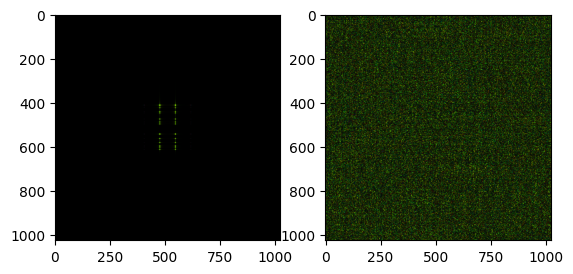

In [ ]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(spl12_obj_ag_sb_all_hsl)
ax[1].imshow(spl12_obj_sb_all_hsl)
plt.savefig(fig_dir + f"temp/Rx_specular_interfere_kx1{kx1}_kx2{kx2}_v1.pdf", dpi=4000, bbox_inches='tight',transparent=True)

In [32]:

## plot beam 1
dx = 300
dy = 300
(x1,x2,y1,y2) = (int(Nrx/2)-dx,int(Nrx/2)+dx,int(Nry/2)-dy,int(Nrx/2)+dy)

fig,ax = plt.subplots(1,3,figsize=(12,12))
ax[0].imshow(spl1_obj_sb_all_hsl)
# ax[1].imshow(np.angle(spl_obj_all),'binary')
ax[1].plot([Nrx/2,Nrx/2],[0,Nry],'w-',linewidth=0.4,alpha=0.5)
ax[1].plot([0,Nrx],[Nry/2,Nry/2],'w-',linewidth=0.4,alpha=0.5)
ax[1].imshow(spl1_obj_ag_sb_all_hsl)
ax[2].plot([(x2-x1)/2,(x2-x1)/2],[0,y2-y1],'w-',linewidth=0.4,alpha=0.5)
ax[2].plot([0,x2-x1],[(y2-y1)/2,(y2-y1)/2],'w-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1+k_mag)*dx,(1+k_mag)*dx],[(1-k_mag)*dy,(1+k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1-k_mag)*dx,(1+k_mag)*dx],[(1-k_mag)*dy,(1-k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1-k_mag)*dx,(1-k_mag)*dx],[(1-k_mag)*dy,(1+k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1-k_mag)*dx,(1+k_mag)*dx],[(1+k_mag)*dy,(1+k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
ax[2].imshow(spl1_obj_ag_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax[2].set_title(f"$\\vec{{k}}_{{x1}}$ = {nra_x_norm[kx1]:.3f}")

spkl_res_dir = fig_dir + f"spkl_res/kx1{kx1}_kx2{kx2}/"
if not os.path.exists(spkl_res_dir):
    os.makedirs(spkl_res_dir)

shouldsave = True
if shouldsave:
    plt.savefig(spkl_res_dir + f"spkl1_res_kx1{kx1}_kx2{kx2}_v1.pdf", dpi=2000, bbox_inches='tight',transparent=True)
    plt.close()
else:
    plt.show()

In [33]:
## plot beam 2

dx = 300
dy = 300
(x1,x2,y1,y2) = (int(Nrx/2)-dx,int(Nrx/2)+dx,int(Nry/2)-dy,int(Nrx/2)+dy)

fig,ax = plt.subplots(1,3,figsize=(12,12))
ax[0].imshow(spl2_obj_sb_all_hsl)
# ax[1].imshow(np.angle(spl_obj_all),'binary')
ax[1].plot([Nrx/2,Nrx/2],[0,Nry],'w-',linewidth=0.4,alpha=0.5)
ax[1].plot([0,Nrx],[Nry/2,Nry/2],'w-',linewidth=0.4,alpha=0.5)
ax[1].imshow(spl2_obj_ag_sb_all_hsl)
ax[2].plot([(x2-x1)/2,(x2-x1)/2],[0,y2-y1],'w-',linewidth=0.4,alpha=0.5)
ax[2].plot([0,x2-x1],[(y2-y1)/2,(y2-y1)/2],'w-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1+k_mag)*dx,(1+k_mag)*dx],[(1-k_mag)*dy,(1+k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1-k_mag)*dx,(1+k_mag)*dx],[(1-k_mag)*dy,(1-k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1-k_mag)*dx,(1-k_mag)*dx],[(1-k_mag)*dy,(1+k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
# ax[2].plot([(1-k_mag)*dx,(1+k_mag)*dx],[(1+k_mag)*dy,(1+k_mag)*dy],'r-',linewidth=0.4,alpha=0.5)
ax[2].imshow(spl2_obj_ag_sb_all_hsl[y1:y2,x1:x2],origin='lower')
ax[2].set_title(f"$\\vec{{k}}_{{x2}}$ = {nra_x_norm[kx2]:.3f}")

spkl_res_dir = fig_dir + f"spkl_res/kx1{kx1}_kx2{kx2}/"
if not os.path.exists(spkl_res_dir):
    os.makedirs(spkl_res_dir)

shouldsave = True
if shouldsave:
    plt.savefig(spkl_res_dir + f"spkl2_res_kx1{kx1}_kx2{kx2}_v1.pdf", dpi=2000, bbox_inches='tight',transparent=True)
    plt.close()
else:
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.711014858032404e-17..1.0].


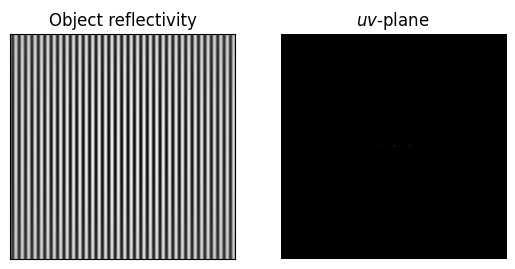

In [20]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(Robj1,cmap='binary',origin='lower')
# ax[0].axis('off')
ax[0].set_xticks([])  # Remove x-axis ticks
ax[0].set_yticks([])  # Remove y-axis ticks
ax[0].set_title('Object reflectivity')
ax[1].imshow(FT_Robj1_log_hsl,origin='lower')
ax[1].axis('off')
ax[1].set_title('$uv$-plane')

obj_uv_res_dir = fig_dir + f"obj_uv_grating/kx1{kx1}_kx2{kx2}/"
if not os.path.exists(obj_uv_res_dir):
    os.makedirs(obj_uv_res_dir)

plt.savefig(obj_uv_res_dir + f"Obj_uv_grating_kx1{kx1}_kx2{kx2}_v1.pdf", dpi=4000, bbox_inches='tight',transparent=True)
plt.show()

In [21]:
pw_sum = np.zeros((Ny,Nx),dtype='complex64')

for itonex in (range(len(nra_x_norm))):
    for itoney in (range(len(nra_y_norm))):
        pw = np.exp(-1j*2*np.pi*m_k*(nra_x_norm[itonex]*X_au + nra_y_norm[itoney]*Y_au))
        pw_sum = pw_sum + pw
# pw = np.exp(-1j*2*np.pi*m_k*(nra_x_norm[5]*X_au + nra_y_norm[5]*Y_au))
spl_obj_ag = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gaus*Robj1*pw_sum)))
spl_obj_bm = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gaus*pw_sum)))
spl_obj = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gaus*Robj1*pw_sum*gamma_r)))

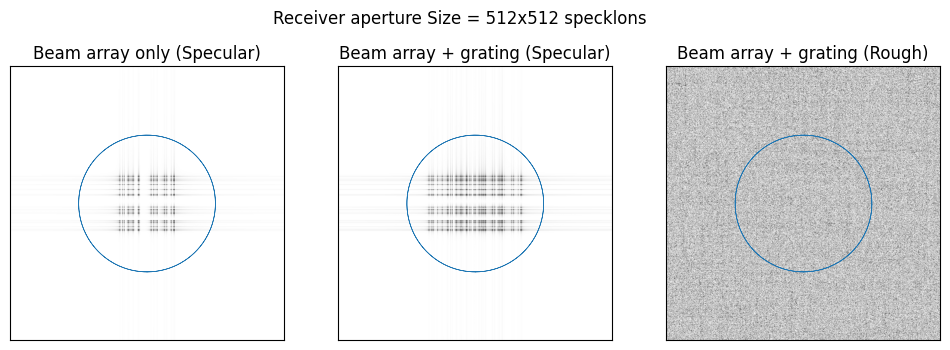

In [22]:
c1 = 1
c2 = 0.0002
spl_obj_ag_log = imag_linear2log_v1(c1,c2,np.abs(spl_obj_ag))
c1 = 1
c2 = 0.0001
spl_obj_ag_bm_log = imag_linear2log_v1(c1,c2,np.abs(spl_obj_bm))

fig,ax = plt.subplots(1,3,figsize=(12,4))
fig.suptitle(f"Receiver aperture Size = {np.round(wx/mgx).astype('int')}x{np.round(wy/mgy).astype('int')} specklons")
ax[0].imshow(np.abs(spl_obj_ag_bm_log),cmap='binary')
ax[0].plot(x_rx,y_rx,'C0',linewidth=0.5)
ax[0].set_xticks([])  # Remove x-axis ticks
ax[0].set_yticks([])  # Remove x-axis ticks
ax[0].set_title("Beam array only (Specular)")
ax[1].imshow(np.abs(spl_obj_ag_log),cmap='binary')
ax[1].plot(x_rx,y_rx,'C0',linewidth=0.5)
ax[1].set_xticks([])  # Remove x-axis ticks
ax[1].set_yticks([])  # Remove x-axis ticks
ax[1].set_title("Beam array + grating (Specular)")
ax[2].imshow(np.abs(spl_obj),cmap='binary')
ax[2].plot(x_rx,y_rx,'C0',linewidth=0.5)
ax[2].set_xticks([])  # Remove x-axis ticks
ax[2].set_yticks([])  # Remove x-axis ticks
ax[2].set_title("Beam array + grating (Rough)")
# plt.colorbar()

uv_spect_dir = fig_dir + f"uv_spectrum/{dimension}x{dimension}/D_cir{D_cir}pixels/"

if not os.path.exists(uv_spect_dir):
    os.makedirs(uv_spect_dir)
plt.savefig(uv_spect_dir + f"uv_spectrum_D_cir{D_cir}pixels_{np.round(wx/mgx).astype('int')}x{np.round(wy/mgy).astype('int')}pixels_v1.pdf", dpi=1000, bbox_inches='tight',transparent=True)
plt.show()

(np.float64(-0.5), np.float64(355.5), np.float64(355.5), np.float64(-0.5))

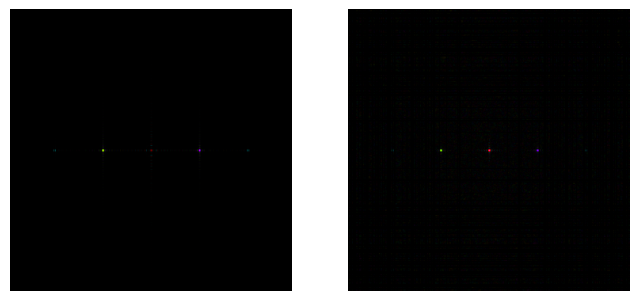

In [23]:
c1 = 1
c2 = 0.000000000001
I_complex_ag_log = imag_linear2log_v1(c1,c2,np.abs(I_complex_ag))
I_complex_log = imag_linear2log_v1(c1,c2,np.abs(I_complex))
I_complex_ag_hsl = chsl.hsl_complex_v1(s0,l0,I_complex_ag_log*np.exp(1j*np.angle(I_complex_ag)))
I_complex_hsl = chsl.hsl_complex_v1(s0,l0,I_complex_log*np.exp(1j*np.angle(I_complex)))

dx = 150
dy = 150
(x1,x2,y1,y2) = (int(Nx_AO/2)-dx,int(Nx_AO/2)+dx,int(Ny_AO/2)-dy,int(Ny_AO/2)+dy)
fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(I_complex_ag_hsl)
ax[0].axis('off')
ax[1].imshow(I_complex_hsl)
ax[1].axis('off')

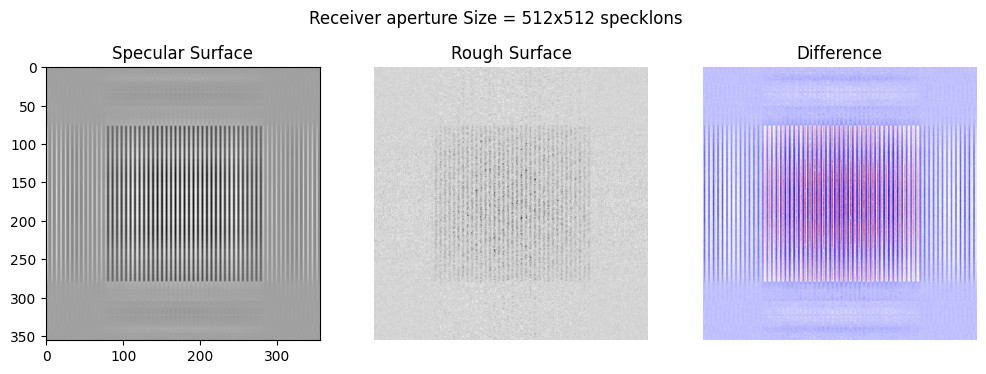

In [24]:
dx = 800
dy = 800
(x1,x2,y1,y2) = (int(Nx_AO/2)-dx,int(Nx_AO/2)+dx,int(Ny_AO/2)-dy,int(Ny_AO/2)+dy)
Ics = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex))))
Ica = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex_ag))))
Icsa = np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex_ag)))) - np.real(np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(I_complex))))

fig,ax = plt.subplots(1,3,figsize=(12,4))
fig.suptitle(f"Receiver aperture Size = {np.round(wx/mgx).astype('int')}x{np.round(wy/mgy).astype('int')} specklons")
ax[0].imshow(Ica,cmap='binary')
ax[0].set_title("Specular Surface")
# ax[0].axis('off')
ax[1].imshow(Ics,cmap='binary')
ax[1].set_title("Rough Surface")
ax[1].axis('off')
ax[2].imshow(Icsa,cmap='bwr')
ax[2].axis('off')
ax[2].set_title("Difference")
plt.savefig(fig_dir + f"temp/recon_image_kx1{kx1}_kx2{kx2}_v1.pdf", dpi=4000, bbox_inches='tight',transparent=True)
plt.show()

In [25]:
pw = np.exp(-1j*2*np.pi*m_k*(nra_x_norm[6]*X_au+nra_y_norm[0]*Y_au))

# D_cir = 100
# W_cir = np.zeros([Ny,Nx])
# W_cir[X_au**2+Y_au**2<(D_cir/2)**2] = 1

## speckle with object reflectivity
# spl_obj = (np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gaus*Robj1*pw*gamma_r))))*W_cir
# spl_obj_hsl = chsl.hsl_complex_v1(s0,l0,spl_obj)

# fig,ax = plt.subplots(figsize=(4,4))
# ax.imshow(spl_obj_hsl)
# plt.savefig(fig_dir + f"temp/RX_pupil_Dcir_v3.pdf", dpi=1000, bbox_inches='tight',transparent=True)
# plt.show()

In [206]:
shouldsave = True
showfig_recon_image_spkl_v3(shouldsave,mgx,mgy,D_cir,dimension,irun,Ica,Ics,I_complex_ag_hsl,I_complex_hsl)
